In [54]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import evaluate, print_perf
from surprise import KNNBasic

# Load & Sample data

In [55]:
dt = pd.read_csv('ratings_Grocery_and_Gourmet_Food.csv')

In [56]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297155 entries, 0 to 1297154
Data columns (total 4 columns):
A1ZQZ8RJS1XVTX    1297155 non-null object
0657745316        1297155 non-null object
5.0               1297155 non-null float64
1381449600        1297155 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.6+ MB


In [57]:
dt.columns = ['reviewerID','productID','rating','unixTime']

In [58]:
dt.head()

,reviewerID,productID,rating,unixTime
0,A31W38VGZAUUM4,0700026444,5.0,1354752000
1,A3I0AV0UJX5OH0,1403796890,1.0,1385942400
2,A3QAAOLIXKV383,1403796890,3.0,1307836800
3,AB1A5EGHHVA9M,141278509X,5.0,1332547200
4,A3DTB6RVENLQ9Q,1453060375,1.0,1362268800


In [59]:
dt['unixTime'] = pd.to_datetime(dt['unixTime'],unit='s')
dt = dt.rename(columns={'unixTime':'date'})

In [60]:
#Only take recent reviews
dt = dt.loc[dt['date']>'2013-01-01']
#Last Date
dt['date'].max()

Timestamp('2014-07-23 00:00:00')

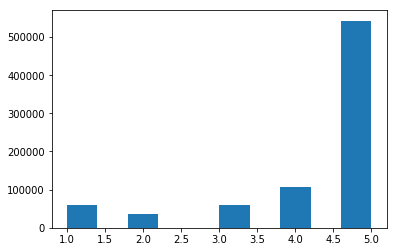

In [61]:
#Histogram of ratings
rating_hist = plt.hist(dt['rating'],align='mid')

In [62]:
#Group new data by product
user_groupby = dt.groupby('reviewerID',as_index=False)
user_review_count = user_groupby['productID'].count()
user_review_count.columns = ['reviewerID','count_review']

In [63]:
#Take top users who rated the most
user_most_ratings = user_review_count.sort_values(by='count_review',ascending=False).head(50)

In [64]:
#Find products rated by these top users
product_rated = dt.loc[dt['reviewerID'].isin(user_most_ratings['reviewerID'])]

In [65]:
#Take top products among top users (i.e top products most rated by top users)
product_to_sample = product_rated.pivot_table('rating',index='productID',aggfunc=len).sort_values(by='rating',ascending=False).head(100)

In [66]:
#Filter original data for these products only
data = dt.loc[dt['productID'].isin(product_to_sample.index)]

In [67]:
#Drop users who have few ratings
ureview_count = data.pivot_table('rating',index='reviewerID',aggfunc=len)
user_interest = ureview_count[ureview_count['rating']>=4]
data = data.loc[data['reviewerID'].isin(user_interest.index)] 

In [68]:
# data.to_csv('sample_data.csv')

In [69]:
data.describe()

,rating
count,6743.000000
mean,3.930891
std,1.058494
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [70]:
data['reviewerID'].nunique()

619